In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('E:/rahul/processed_data/Central_india.csv',index_col=[0])
data

,BT_6V,BT_6H,BT_10V,BT_10H,BT_18V,BT_18H,BT_36V,BT_36H,BT_89V,BT_89H,MODIS_LST,SM,VegWater,PR6,PR10,PR18,PR36,PR89
0,301.0,277.4,299.5,279.2,301.9,285.5,299.8,287.7,303.1,296.7,322.363373,0.098,0.94,0.921595,0.932220,0.945677,0.959640,0.978885
1,301.2,278.7,300.6,281.1,302.9,287.5,300.7,289.4,301.2,294.1,323.428192,0.103,1.10,0.925299,0.935130,0.949158,0.962421,0.976428
2,301.3,279.6,301.1,282.0,303.3,288.3,301.0,290.3,301.2,294.1,323.094177,0.105,1.20,0.927979,0.936566,0.950544,0.964452,0.976428
3,301.5,279.9,301.5,282.7,303.5,288.7,301.2,290.6,300.8,294.5,323.235107,0.107,1.13,0.928358,0.937645,0.951236,0.964807,0.979056
4,301.0,280.1,301.4,282.8,303.6,289.0,301.2,290.7,302.2,295.6,324.284515,0.107,1.17,0.930565,0.938288,0.951910,0.965139,0.978160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12917,303.1,282.2,303.4,285.4,305.2,294.0,303.4,296.3,300.0,298.6,322.693146,0.087,2.74,0.931046,0.940672,0.963303,0.976599,0.995333
12918,302.0,281.6,302.1,284.7,303.6,293.2,301.5,295.1,298.1,296.7,321.220734,0.098,2.97,0.932450,0.942403,0.965744,0.978773,0.995304
12919,299.9,279.2,300.1,282.4,301.6,291.3,299.1,293.0,297.1,295.9,320.268524,0.107,3.13,0.930977,0.941020,0.965849,0.979605,0.995961
12920,303.5,283.3,303.7,286.8,305.3,294.7,303.4,296.8,299.6,297.7,320.424225,0.078,2.73,0.933443,0.944353,0.965280,0.978247,0.993658


In [3]:
data['(36V-18V)^2']=(data['BT_36V']-data['BT_18V'])**2

In [4]:
# correlation matrix
correlation_matrix=data.corr()
correlation_matrix

,BT_6V,BT_6H,BT_10V,BT_10H,BT_18V,BT_18H,BT_36V,BT_36H,BT_89V,BT_89H,MODIS_LST,SM,VegWater,PR6,PR10,PR18,PR36,PR89,(36V-18V)^2
BT_6V,1.000000,0.629765,0.924506,0.537309,0.920717,0.639681,0.907612,0.724158,0.751715,0.709143,0.493265,-0.146924,-0.123934,-0.141363,-0.245351,-0.269298,-0.209745,-0.067537,0.487265
BT_6H,0.629765,1.000000,0.556008,0.839027,0.530980,0.800415,0.512280,0.743805,0.468297,0.578562,0.444420,-0.119433,0.025632,0.679843,0.488857,0.429252,0.430252,0.227722,0.306132
BT_10V,0.924506,0.556008,1.000000,0.614010,0.991048,0.725388,0.977140,0.809459,0.814308,0.788710,0.543404,-0.130610,-0.089828,-0.163555,-0.224408,-0.239571,-0.176604,-0.032511,0.524998
BT_10H,0.537309,0.839027,0.614010,1.000000,0.582325,0.958044,0.557674,0.877640,0.510473,0.678198,0.483266,-0.119668,0.093592,0.564978,0.631320,0.580108,0.580210,0.342276,0.365781
BT_18V,0.920717,0.530980,0.991048,0.582325,1.000000,0.705407,0.991466,0.798723,0.835328,0.795253,0.549042,-0.113240,-0.124163,-0.192117,-0.254774,-0.277659,-0.216169,-0.060651,0.496288
BT_18H,0.639681,0.800415,0.725388,0.958044,0.705407,1.000000,0.692849,0.969951,0.576311,0.783355,0.451136,-0.074419,0.239013,0.418486,0.470006,0.485025,0.523594,0.421293,0.352027
BT_36V,0.907612,0.512280,0.977140,0.557674,0.991466,0.692849,1.000000,0.803526,0.855743,0.816145,0.553367,-0.077379,-0.096041,-0.204072,-0.271879,-0.284486,-0.221692,-0.059569,0.381723
BT_36H,0.724158,0.743805,0.809459,0.877640,0.798723,0.969951,0.803526,1.000000,0.671955,0.861716,0.475352,-0.036783,0.250673,0.265554,0.287741,0.328781,0.402290,0.389034,0.290954
BT_89V,0.751715,0.468297,0.814308,0.510473,0.835328,0.576311,0.855743,0.671955,1.000000,0.870376,0.668231,-0.019418,-0.277622,-0.113293,-0.170570,-0.249856,-0.215448,-0.233963,0.230388
BT_89H,0.709143,0.578562,0.788710,0.678198,0.795253,0.783355,0.816145,0.861716,0.870376,1.000000,0.534949,0.004904,0.085312,0.068389,0.061983,0.080515,0.156725,0.275053,0.193029


In [5]:
y0=data['MODIS_LST']
x0=data[["BT_6V","BT_6H","BT_10V","BT_10H","BT_18V","BT_18H","BT_36V","BT_36H","BT_89V","BT_89H","(36V-18V)^2"]]
# x0=data.drop(['MODIS_LST','SM','VegWater'],axis='columns')
X_train, X_test, Y_train, Y_test = train_test_split(x0, y0, test_size=0.30, random_state=42)

In [6]:
sc_X=StandardScaler()  
sc_Y=StandardScaler()  
X_train_sc=sc_X.fit_transform(X_train)
Y_train=np.array(Y_train).reshape(-1,1)
Y_train_sc=sc_Y.fit_transform(Y_train)

# LinearRegression

In [7]:
reg = LinearRegression().fit(X_train_sc, Y_train_sc)
Y_pred=sc_Y.inverse_transform(reg.predict(sc_X.transform(X_test)))
print("R2-: ",reg.score(sc_X.fit_transform(X_test),sc_Y.fit_transform(np.array(Y_test).reshape(-1,1))))
print("coeff: ", reg.coef_)
print("intercept: ",reg.intercept_)

R2-:  0.560710673147363
coeff:  [[-0.15011632  0.06019305 -0.33010244  1.38258075 -0.74449495 -1.87699495
   1.26315148  0.754129    0.6208452  -0.26104218  0.1620953 ]]
intercept:  [-8.81570088e-15]


In [8]:
RMSE=np.round(mean_squared_error(Y_test,Y_pred,squared=False),decimals=3)
print("RMSE: ",RMSE,"K")

RMSE:  2.994 K


In [9]:
error=Y_test-Y_pred.reshape(-1)


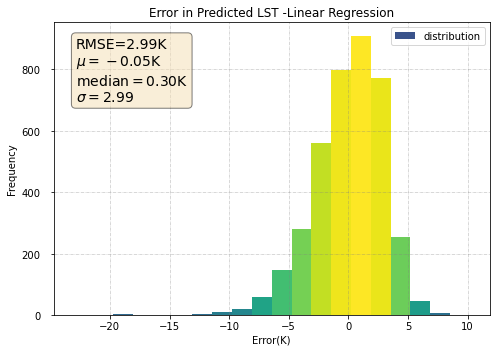

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
  
  
N_points = 10000
n_bins = 20
  
# Creating distribution
legend = ['distribution']
  
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(7,5), 
                        tight_layout = True)
  
axs.xaxis.set_tick_params(pad = 2) 
axs.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
axs.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.6) 
  
mu = error.mean()
median = np.median(error)
sigma = error.std()

textstr = '\n'.join((r'RMSE=%.2fK' % (RMSE, ),
    r'$\mu=%.2f$K' % (mu, ),
    r'$\mathrm{median}=%.2f$K' % (median, ),
    r'$\sigma=%.2f$' % (sigma, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
axs.text(0.05, 0.95, textstr, transform=axs.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Creating histogram
N, bins, patches = axs.hist(error, bins = n_bins)
  
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
  
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
  
plt.xlabel("Error(K)")
plt.ylabel("Frequency")
plt.legend(legend)
plt.title('Error in Predicted LST -Linear Regression')
plt.show()

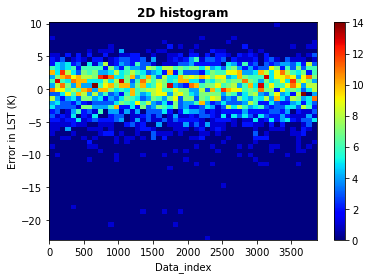

In [11]:
plt.hist2d(np.arange(0,len(error)),error, (50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel("Data_index")
plt.ylabel("Error in LST (K)")
plt.title('2D histogram', fontweight ="bold")
  
plt.show()

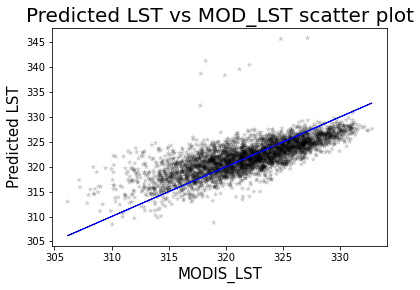

In [12]:
plt.scatter(Y_test,Y_pred,c='Black',marker='*',alpha=0.2,edgecolors='none')
plt.title("Predicted LST vs MOD_LST scatter plot",fontsize=20)
plt.ylabel("Predicted LST",fontsize=15)
plt.xlabel("MODIS_LST",fontsize=15)
plt.plot(Y_test,Y_test,c='blue',lw=1)
plt.show()

# PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=3, svd_solver='full')
l=pca.fit_transform(x0)
print(pca.explained_variance_ratio_)

[0.74078998 0.14152939 0.05125348]


# Support vector regression

In [15]:
regressor=SVR(kernel='rbf')
regressor.fit(X_train_sc,Y_train_sc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [16]:
Y_pred=sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
print("R-Square: ",r2_score(Y_test,Y_pred))

R-Square:  0.6623978463027442


In [17]:
df=pd.DataFrame({})
df['MOD_LST']=Y_test
df['pred_LST']=Y_pred
df['Error']=Y_test-Y_pred
df.describe()

,MOD_LST,pred_LST,Error
count,3877.000000,3877.000000,3877.000000
mean,321.797151,322.105057,-0.307905
std,4.514893,3.598179,2.605176
min,306.146637,310.438399,-11.968380
25%,318.673065,319.785135,-1.883471
50%,321.920898,321.876547,-0.042583
75%,325.161438,324.595568,1.507082
max,332.798920,332.296243,7.399563


In [18]:
RMSE=np.round(mean_squared_error(Y_test,Y_pred,squared=False),decimals=3)
print("RMSE: ",RMSE,"K")

RMSE:  2.623 K


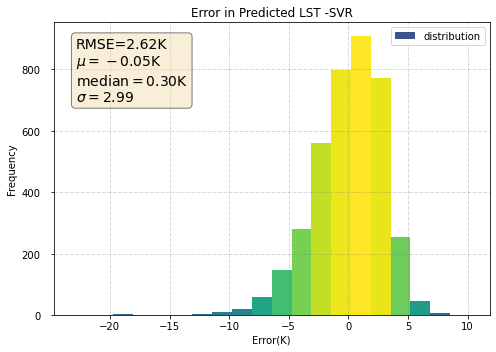

In [19]:

N_points = 10000
n_bins = 20
  
# # Creating distribution
# legend = ['distribution']
  
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(7,5), 
                        tight_layout = True)
  
axs.xaxis.set_tick_params(pad = 2) 
axs.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
axs.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.6) 
  
mu = error.mean()
median = np.median(error)
sigma = error.std()

textstr = '\n'.join((r'RMSE=%.2fK' % (RMSE, ),
    r'$\mu=%.2f$K' % (mu, ),
    r'$\mathrm{median}=%.2f$K' % (median, ),
    r'$\sigma=%.2f$' % (sigma, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
axs.text(0.05, 0.95, textstr, transform=axs.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Creating histogram
N, bins, patches = axs.hist(error, bins = n_bins)
  
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
  
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
  
plt.xlabel("Error(K)")
plt.ylabel("Frequency")
plt.legend(legend)
plt.title('Error in Predicted LST -SVR')
plt.show()

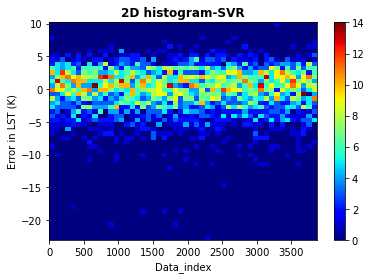

In [20]:
plt.hist2d(np.arange(0,len(error)),error, (50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel("Data_index")
plt.ylabel("Error in LST (K)")
plt.title('2D histogram-SVR', fontweight ="bold")
  
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_sc, Y_train_sc)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.556, total=   1.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.552, total=   1.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.546, total=   1.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.556, total=   1.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.557, total=   1.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.593, total=   1.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.594, total=   1.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.583, total=   1.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.606, total=   1.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.591, total=   1.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.543, total=   1.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.542, total=   1.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.524, total=   1.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.553, total=   1.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.536, total=   1.5s
[CV] C=1, gamma=1, kernel=rbf ........................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.652, total=   2.1s
[CV] C=1, gamma=1, kernel=rbf ........................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.660, total=   2.3s
[CV] C=1, gamma=1, kernel=rbf ........................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.648, total=   2.3s
[CV] C=1, gamma=1, kernel=rbf ........................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.663, total=   2.4s
[CV] C=1, gamma=1, kernel=rbf ........................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.660, total=   2.3s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.639, total=   1.6s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.646, total=   1.6s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.628, total=   1.7s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.659, total=   1.8s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.648, total=   1.8s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.584, total=   1.6s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.586, total=   1.7s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.559, total=   1.5s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.602, total=   1.5s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.586, total=   1.6s
[CV] C=10, gamma=1, kernel=rbf .......................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.631, total=   8.8s
[CV] C=10, gamma=1, kernel=rbf .......................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.650, total=   9.4s
[CV] C=10, gamma=1, kernel=rbf .......................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.623, total=   8.8s
[CV] C=10, gamma=1, kernel=rbf .......................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.655, total=   8.8s
[CV] C=10, gamma=1, kernel=rbf .......................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.635, total=   9.1s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.654, total=   3.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.670, total=   2.9s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.656, total=   3.2s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.676, total=   2.9s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.672, total=   3.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.610, total=   1.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.614, total=   1.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.589, total=   1.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.632, total=   1.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.616, total=   2.0s
[CV] C=100, gamma=1, kernel=rbf ......................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=100, gamma=1, kernel=rbf, score=0.484, total=  47.5s
[CV] C=100, gamma=1, kernel=rbf ......................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=100, gamma=1, kernel=rbf, score=0.524, total=  47.7s
[CV] C=100, gamma=1, kernel=rbf ......................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=100, gamma=1, kernel=rbf, score=0.458, total=  47.5s
[CV] C=100, gamma=1, kernel=rbf ......................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=100, gamma=1, kernel=rbf, score=0.525, total=  50.4s
[CV] C=100, gamma=1, kernel=rbf ......................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=100, gamma=1, kernel=rbf, score=0.492, total=  44.1s
[CV] C=100, gamma=0.1, kernel=rbf ....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.658, total=  14.2s
[CV] C=100, gamma=0.1, kernel=rbf ....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.676, total=  13.6s
[CV] C=100, gamma=0.1, kernel=rbf ....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.670, total=  14.2s
[CV] C=100, gamma=0.1, kernel=rbf ....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.681, total=  14.2s
[CV] C=100, gamma=0.1, kernel=rbf ....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.672, total=  14.7s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.630, total=   3.3s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.629, total=   3.3s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.613, total=   3.3s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.646, total=   3.3s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.635, total=   3.5s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  7.4min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [22]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVR(C=100, gamma=0.1)


In [23]:
Y_pred=sc_Y.inverse_transform(grid.predict(sc_X.transform(X_test)))
print("R-Square: ",r2_score(Y_test,Y_pred))



R-Square:  0.6968600520361985


# Decision Tree

In [21]:
regressor= tree.DecisionTreeRegressor()
regressor.fit(X_train_sc,Y_train_sc)
Y_pred=sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
print("R-Square: ",r2_score(Y_test,Y_pred))

R-Square:  0.33138461711516565
